In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv("Data_Sources/movies_data.csv")
df.head()

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,tagline,title,vote_average,vote_count,cast,director
0,237000000,"Action,Adventure,Fantasy,Science,Fiction",culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...",United States of America,-2147483648,162,Enter the World of Pandora.,Avatar,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron
1,300000000,"Adventure,Fantasy,Action",ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",United States of America,961000000,169,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",Gore Verbinski
2,245000000,"Action,Adventure,Crime",spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']",United Kingdom,880674609,148,A Plan No One Escapes,Spectre,6.3,4466,"Daniel Craig, Christoph Waltz, L\u00e9a Seydou...",Sam Mendes
3,250000000,"Action,Crime,Drama,Thriller",dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",United States of America,1084939099,165,The Legend Ends,The Dark Knight Rises,7.6,9106,"Christian Bale, Michael Caine, Gary Oldman, An...",Christopher Nolan
4,260000000,"Action,Adventure,Science,Fiction",based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],United States of America,284139100,132,"Lost in our world, found in another.",John Carter,6.1,2124,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",Andrew Stanton


In [3]:
# split the genres column into multiple columns
genres = df['genres'].str.split(',', expand=True)

# add the new columns to the dataframe
df = pd.concat([df, genres], axis=1)

df

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,...,vote_average,vote_count,cast,director,0,1,2,3,4,5
0,237000000,"Action,Adventure,Fantasy,Science,Fiction",culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...",United States of America,-2147483648,...,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,Action,Adventure,Fantasy,Science,Fiction,None
1,300000000,"Adventure,Fantasy,Action",ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",United States of America,961000000,...,6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",Gore Verbinski,Adventure,Fantasy,Action,None,None,None
2,245000000,"Action,Adventure,Crime",spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']",United Kingdom,880674609,...,6.3,4466,"Daniel Craig, Christoph Waltz, L\u00e9a Seydou...",Sam Mendes,Action,Adventure,Crime,None,None,None
3,250000000,"Action,Crime,Drama,Thriller",dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",United States of America,1084939099,...,7.6,9106,"Christian Bale, Michael Caine, Gary Oldman, An...",Christopher Nolan,Action,Crime,Drama,Thriller,None,None
4,260000000,"Action,Adventure,Science,Fiction",based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],United States of America,284139100,...,6.1,2124,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",Andrew Stanton,Action,Adventure,Science,Fiction,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,220000,"Action,Crime,Thriller",united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,['Columbia Pictures'],Mexico,2040920,...,6.6,238,"Carlos Gallardo, Jaime de, Hoyos Peter, Marqua...",Robert Rodriguez,Action,Crime,Thriller,None,None,None
4797,9000,"Comedy,Romance",",",en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],",",0,...,5.9,5,"Edward Burns, Kerry Bish\u00e9, Marsha Dietlei...",Edward Burns,Comedy,Romance,None,None,None,None
4798,0,"Comedy,Drama,Romance,TV,Movie",date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"['Front Street Pictures', 'Muse Entertainment ...",United States of America,0,...,7.0,6,"Eric Mabius, Kristin Booth, Crystal Lowe, Geof...",Scott Smith,Comedy,Drama,Romance,TV,Movie,None
4799,0,",",",",en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],United States of America,0,...,5.7,7,"Daniel Henney, Eliza Coupe, Bill Paxton, Alan ...",Daniel Hsia,,,None,None,None,None


In [4]:

# compute the mean revenue for each genre
genre_revenue = df.groupby(0)['revenue'].mean()

genre_df = pd.DataFrame({
    'genre':genre_revenue.index,
    'avg_revenue': df.groupby(0)['revenue'].mean()
})
genre_df = genre_df.reset_index(drop=True)
genre_df = genre_df.drop(index=0).reset_index(drop=True)
genre_df



,genre,avg_revenue
0,Action,1.153157e+08
1,Adventure,2.109611e+08
2,Animation,2.417656e+08
3,Comedy,5.178074e+07
4,Crime,4.832888e+07
5,Documentary,8.851544e+06
6,Drama,4.540021e+07
7,Family,1.594183e+08
8,Fantasy,1.475592e+08
9,Foreign,5.565000e+04


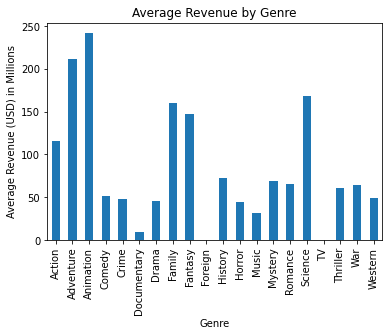

In [5]:
# create a bar chart of the average revenue by genre
fig, ax=plt.subplots()
genre_df.plot.bar(x='genre', y='avg_revenue', rot=90, ax=ax)

# set the title and axis labels
plt.title('Average Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue (USD) in Millions')
ax.legend().set_visible(False)
scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

#save figure
plt.savefig('Images/genre_revenue.png', dpi=100)

# display the chart
plt.show()


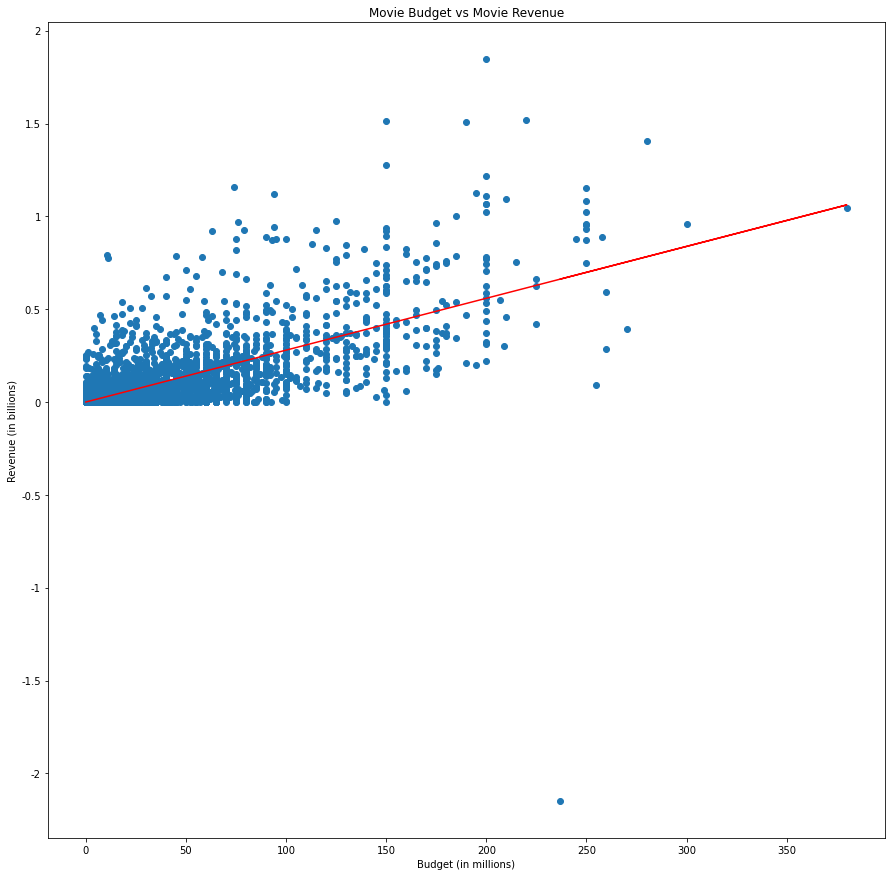

In [6]:
# create a scatter plot of movie budget vs movie revenue
fig, ax = plt.subplots(figsize=(15, 15))
x = df['budget']
y= df['revenue']
ax.scatter(x,y)
ax.set_xlabel('Budget (in millions)')
ax.set_ylabel('Revenue (in billions)')
ax.set_title('Movie Budget vs Movie Revenue')
scale_x = 1e6
scale_y = 1e9
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
ax.xaxis.set_major_formatter(ticks_x)
# Fit a linear regression line to the data
coeffs = np.polyfit(x, y, 1)
line = np.poly1d(coeffs)

# Plot the regression line
plt.plot(x, line(x), color='r')

#save figure
plt.savefig('Images/budget_revenue.png', dpi=100)

# display the plot
plt.show()